# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [3]:
import pandas as pd
import numpy as np

## Regression Model Evaluation

In [5]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [7]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test  = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [14]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train)


LinearRegression()

## 3. Calculate and print R-squared for both the training and the testing set.

In [17]:
from sklearn.metrics import mean_squared_error as mse 
y_pred = linreg.predict(X_test)

mse(y_test, y_pred) 

0.555891598695244

## 4. Calculate and print mean squared error for both the training and the testing set.

In [18]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred, squared=False)

0.7455813830127761

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [19]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

mae(y_test, y_pred)

0.5332001304956566

## Classification Model Evaluation

In [20]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [21]:
X_train, X_test, y_train, y_test  = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

/Users/ruben/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ruben/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [31]:
from sklearn.metrics import accuracy_score as acc
y_pred_logreg=logreg.predict(X_test)

y_prob=logreg.predict_proba(X_test)

acc(y_test, y_pred_logreg)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [33]:
from sklearn.metrics import balanced_accuracy_score as bacc
bacc(y_test, y_pred_logreg)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [36]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred_logreg, average='macro')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [38]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred_logreg, average='macro')

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [40]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_logreg, average='macro')

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [42]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred_logreg)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

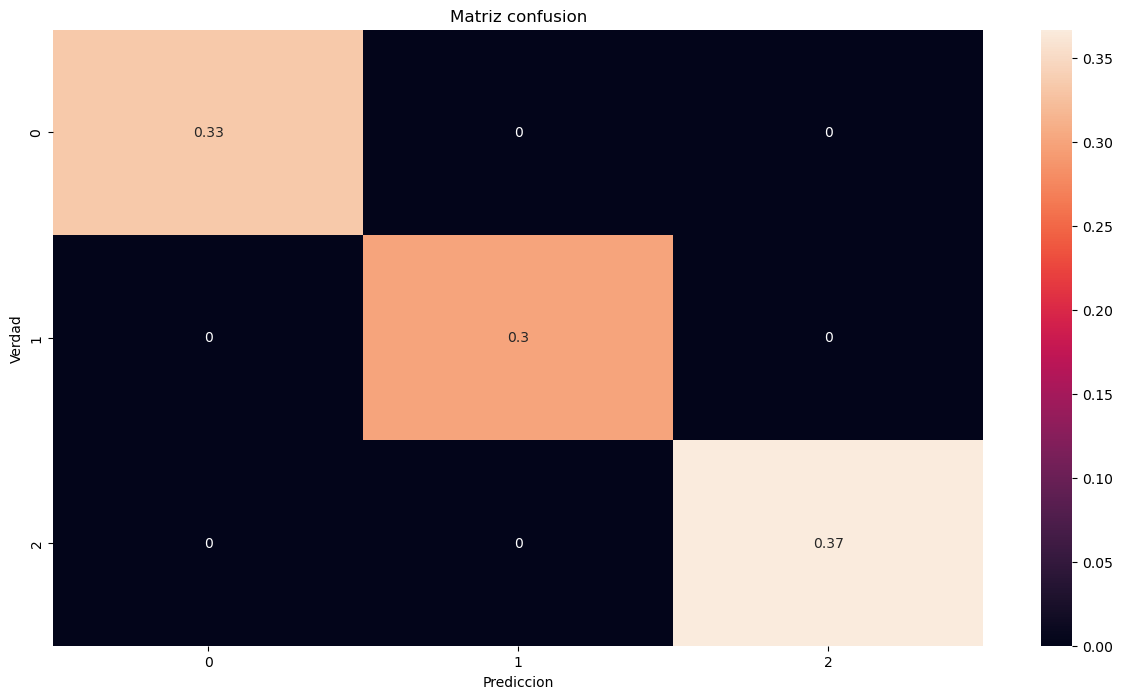

In [44]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_logreg)/sum(sum(cm(y_test, y_pred_logreg))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.